# objective : we would like to predict, median house values in California 

1. in order to solve this problem we are going to use the regression algoritham

In [3]:
import numpy as np # to perform numerical operations
import pandas as pd # for data manipulations and data agrregations
import matplotlib.pyplot as plt
import seaborn as sns   # for visualization
from sklearn.linear_model import LinearRegression #  To Build regression algo
import statsmodels.api as sm # to build the statstical models
from sklearn.model_selection import train_test_split # to divide the data into train and test
import sklearn.metrics 

# import housing dataset into python

In [5]:
house=pd.read_csv(r"C:\Users\anush\Documents\DataScience_Jan_2020_batch\datasets-20200404T093118Z-001\datasets\housing.csv")

# Basic sanity check

In [6]:
house.shape # number of observations and number of columns

(20640, 10)

In [9]:
list(house.columns)  # variable names of a housing dataset

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [10]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

house.info() # description about the table

# produce the frequnecy distribution for ocean_proximity variable

In [11]:
house["ocean_proximity"].value_counts()/len(house)*100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

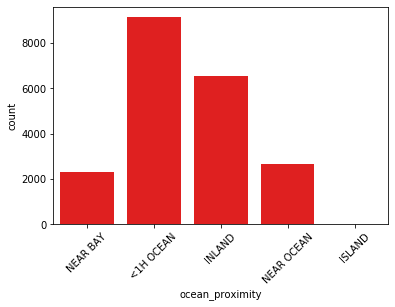

In [12]:
sns.countplot(house["ocean_proximity"],color="red")
plt.xticks(rotation=45)

# insights:

1. 57% of customers are near the ocean or <1H to ocean
2. 0.02% of customers are staying in Island


In [13]:
house.describe().T # producing the summary statstics for numerical variables

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


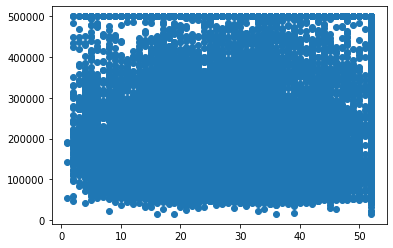

In [14]:
# assumptions 1: as housing median age is increasing what about median house value(is it increase or decrease)
plt.scatter(house["housing_median_age"],house["median_house_value"])

(array([1823., 4916., 4864., 5455., 3582.]),
 array([ 1. , 11.2, 21.4, 31.6, 41.8, 52. ]),
 <a list of 5 Patch objects>)

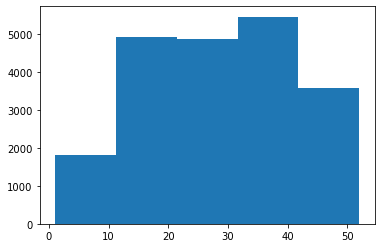

In [10]:
plt.hist(house["housing_median_age"],bins=5)

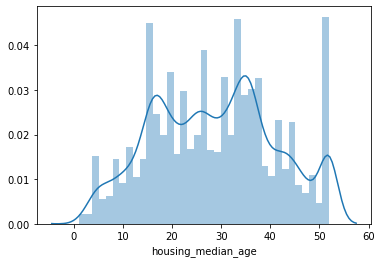

In [11]:
sns.distplot(house["housing_median_age"])

In [12]:
from statsmodels.graphics.gofplots import qqplot


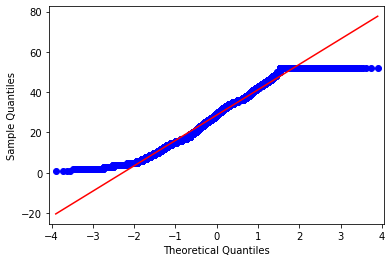

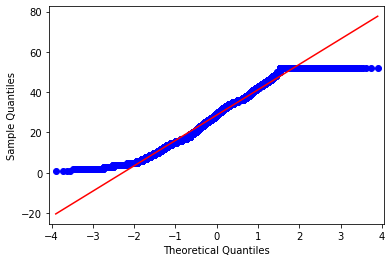

In [13]:
qqplot(house["housing_median_age"],line="s")

In [14]:
house["total_rooms"].quantile([0,0.05,0.25,0.5,0.75,0.95,0.997,1])

0.000        2.000
0.050      620.950
0.250     1447.750
0.500     2127.000
0.750     3148.000
0.950     6213.200
0.997    16887.071
1.000    39320.000
Name: total_rooms, dtype: float64

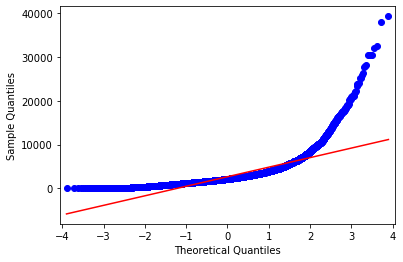

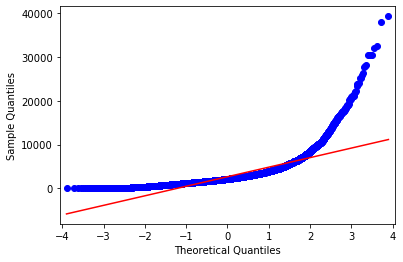

In [15]:
qqplot(house["total_rooms"],line="s")

In [16]:
np.q

AttributeError: module 'numpy' has no attribute 'q'

# user defined function for outliers

In [17]:
def out_cal(data,x):
    iqr=data[x].quantile(0.75)-data[x].quantile(0.25)
    lo=data[x].quantile(0.25)-(1.5*iqr)
    uo=data[x].quantile(0.75)+(1.5*iqr)
    print("lower outlier value",lo)
    print("upper outlier value",uo)
    

In [18]:
out_cal(data=house,x="total_rooms")

lower outlier value -1102.625
upper outlier value 5698.375


In [19]:
def numerical_summary_stat(data):
    sumry_stat=data.describe().T
    sumry_stat["%missing"]=round((len(data)-sumry_stat["count"])/len(data)*100,3)
    sumry_stat["lo"]=sumry_stat["25%"]-(1.5*(sumry_stat["75%"]-sumry_stat["25%"]))
    sumry_stat["uo"]=sumry_stat["75%"]+(1.5*(sumry_stat["75%"]-sumry_stat["25%"]))
    sumry_stat1=sumry_stat[["count","min","25%","50%","mean","75%","max","std","%missing","lo","uo"]]
    sumry_stat1.to_excel("C:\\Users\\Koti\\Desktop\\DVS\\DVS_jul\\Regression_problem_statements\\summary_Stat\\numerical_summary.xls")
    return sumry_stat1

In [20]:
numerical_summary_stat(data=house)

,count,min,25%,50%,mean,75%,max,std,%missing,lo,uo
longitude,20640.0,-124.3500,-121.8000,-118.4900,-119.569704,-118.01000,-114.3100,2.003532,0.000,-127.485000,-112.325000
latitude,20640.0,32.5400,33.9300,34.2600,35.631861,37.71000,41.9500,2.135952,0.000,28.260000,43.380000
housing_median_age,20640.0,1.0000,18.0000,29.0000,28.639486,37.00000,52.0000,12.585558,0.000,-10.500000,65.500000
total_rooms,20640.0,2.0000,1447.7500,2127.0000,2635.763081,3148.00000,39320.0000,2181.615252,0.000,-1102.625000,5698.375000
total_bedrooms,20433.0,1.0000,296.0000,435.0000,537.870553,647.00000,6445.0000,421.385070,1.003,-230.500000,1173.500000
population,20640.0,3.0000,787.0000,1166.0000,1425.476744,1725.00000,35682.0000,1132.462122,0.000,-620.000000,3132.000000
households,20640.0,1.0000,280.0000,409.0000,499.539680,605.00000,6082.0000,382.329753,0.000,-207.500000,1092.500000
median_income,20640.0,0.4999,2.5634,3.5348,3.870671,4.74325,15.0001,1.899822,0.000,-0.706375,8.013025
median_house_value,20640.0,14999.0000,119600.0000,179700.0000,206855.816909,264725.00000,500001.0000,115395.615874,0.000,-98087.500000,482412.500000


In [60]:
house1=house.fillna(method="ffill")

In [61]:
house2=pd.get_dummies(house) # it converts categorical variable into numerical variable in the form of binary(one hot encoding)

In [62]:
house2.shape

(20640, 14)

In [63]:
from sklearn.linear_model import LinearRegression  # this will help us to impute the numerical varaible missing values
from sklearn.linear_model import LogisticRegression # this will help us to impute the categorical varaible missing values
def fillnan(df):
    columns = df.columns[df.isnull().any()] # storing the missing values into columns
    for name in columns:
        y = df.loc[df[name].notnull(), name].values # the varaibles, which are having missing but consider only non missing rows of missing variables
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values # non missing variables values are considering
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values # missing rows 
        if df[name].dtypes == 'object':
            model = LogisticRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = LinearRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [64]:
house3=fillnan(df=house2)

In [65]:
house3.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [66]:
house3.shape

(20640, 14)

In [67]:
house3.nunique() # number of unique values for each columns

longitude                       844
latitude                        862
housing_median_age               52
total_rooms                    5926
total_bedrooms                 2130
population                     3888
households                     1815
median_income                 12928
median_house_value             3842
ocean_proximity_<1H OCEAN         2
ocean_proximity_INLAND            2
ocean_proximity_ISLAND            2
ocean_proximity_NEAR BAY          2
ocean_proximity_NEAR OCEAN        2
dtype: int64

In [29]:
def outlier_cal(data,var):
    iqr=data[var].quantile(0.75)-data[var].quantile(0.25)
    lo=data[var].quantile(0.25)-(1.5*iqr)
    uo=data[var].quantile(0.75)+(1.5*iqr)
    print("lowr outlier cut off values for",var,"Variable is",lo)
    print("upper outlier cut off values for",var,"Variable is",uo)

In [30]:
outlier_cal(data=house3,var="median_house_value")

lowr outlier cut off values for median_house_value Variable is -98087.5
upper outlier cut off values for median_house_value Variable is 482412.5


In [31]:
house3["median_house_value"].min()

14999

In [32]:
house3["median_house_value"].max()

500001

In [33]:
def outlier_cal(data):
    col=list(data.columns)
    for i in col:
        iqr=data[i].quantile(0.75)-data[i].quantile(0.25)
        lo=data[i].quantile(0.25)-(1.5*iqr)
        uo=data[i].quantile(0.75)+(1.5*iqr)
        data[i]=np.where(data[i]>uo,uo,data[i])
        data[i]=np.where(data[i]<lo,lo,data[i])
    return data
        

In [34]:
house4=outlier_cal(data=house3)

In [35]:
house4["median_house_value"].max()

482412.5

# check weather depdent variable is normally distributed or not

In [36]:
house4["median_house_value"].skew()

0.912330478793392

In [37]:
np.log(house4["median_house_value"]).skew()

-0.1973276068628844

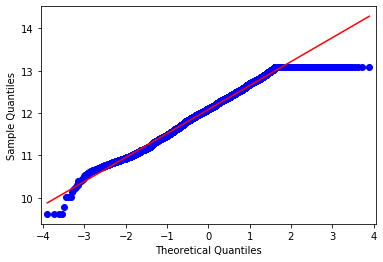

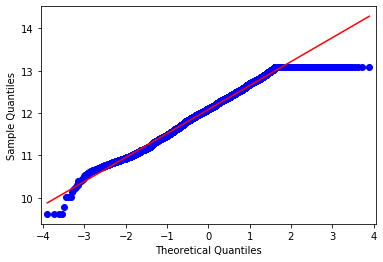

In [38]:
qqplot(np.log(house4["median_house_value"]),line="s")

In [39]:
house4["median_house_value"]=np.log(house4["median_house_value"])

# divide the data into training and test

1. most likely people used to follow either 80% of data into training and 20% of data into test
2. some of them may go 70% of data into training and 30% of data into test

In [40]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(house4,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(16512, 14) (4128, 14)


# for our given data we can able to apply below varaible reduction techniques

1. pairwise correlation
2. multicolinarity--- VIF
3. P-value

In [41]:
def pairwise_cal(data,depdent_col):
    x_var=data.drop([depdent_col],axis=1)
    col=list(x_var.columns)
    for i in col:
        abc=abs(np.corrcoef(data[i],data[depdent_col])[0][1])
        print("variable correlation",i,"values are",abc)
        

In [42]:
pairwise_cal(data=train,depdent_col="median_house_value")

variable correlation longitude values are 0.02426882069610849
variable correlation latitude values are 0.19156034323399826
variable correlation housing_median_age values are 0.07637187635709264
variable correlation total_rooms values are 0.19372104483866795
variable correlation total_bedrooms values are 0.09183918294860283
variable correlation population values are 0.013562958251265375
variable correlation households values are 0.11513859569507394
variable correlation median_income values are 0.6850973112581209
variable correlation ocean_proximity_<1H OCEAN values are 0.3311592138723699
variable correlation ocean_proximity_INLAND values are 0.5697733642954543
variable correlation ocean_proximity_ISLAND values are nan
variable correlation ocean_proximity_NEAR BAY values are nan
variable correlation ocean_proximity_NEAR OCEAN values are nan


C:\Users\Koti\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Koti\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [43]:
house3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [44]:
def out_cal(data,x):
    iqr=data[x].quantile(0.75)-data[x].quantile(0.25)
    lo=data[x].quantile(0.25)-(1.5*iqr)
    uo=data[x].quantile(0.75)+(1.5*iqr)
    print("lower outlier value",lo)
    print("upper outlier value",uo)

In [45]:
out_cal(data=house3,x="ocean_proximity_NEAR OCEAN")

lower outlier value 0.0
upper outlier value 0.0


In [46]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [47]:
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [48]:
abc=house3.nunique()>2
abc1=pd.DataFrame(abc)
house4=house3[abc1[abc1[0]==True].index]
house5=house3[abc1[abc1[0]==False].index]
house4.head()
house6=pd.concat([house4,house5],axis=1)
house6.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,13.022764,0.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,12.789684,0.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,12.771671,0.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,12.740517,0.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,12.743151,0.0,0.0,0.0,0.0,0.0


In [68]:
def outlier_cal(data):
    abc=data.nunique()>2
    abc1=pd.DataFrame(abc)
    data1=data[abc1[abc1[0]==True].index].copy()
    data2=data[abc1[abc1[0]==False].index].copy()
    col=list(data1.columns)
    for i in col:
        iqr=data1[i].quantile(0.75)-data1[i].quantile(0.25)
        lo=data1[i].quantile(0.25)-(1.5*iqr)
        uo=data1[i].quantile(0.75)+(1.5*iqr)
        data1[i]=np.where(data1[i]>uo,uo,data1[i])
        data1[i]=np.where(data1[i]<lo,lo,data1[i])
    data2=pd.concat([data1,data2],axis=1)
    return data2

In [69]:
house4=outlier_cal(data=house3)

In [70]:
house4.nunique()

longitude                       844
latitude                        862
housing_median_age               52
total_rooms                    4808
total_bedrooms                 1360
population                     2919
households                     1087
median_income                 12303
median_house_value             3779
ocean_proximity_<1H OCEAN         2
ocean_proximity_INLAND            2
ocean_proximity_ISLAND            2
ocean_proximity_NEAR BAY          2
ocean_proximity_NEAR OCEAN        2
dtype: int64

In [71]:
house4["median_house_value"].max()

482412.5

In [72]:
house4["median_house_value"]=np.log(house4["median_house_value"])

In [73]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(house4,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(16512, 14) (4128, 14)


In [74]:
def pairwise_cal(data,depdent_col):
    x_var=data.drop([depdent_col],axis=1)
    col=list(x_var.columns)
    for i in col:
        abc=abs(np.corrcoef(data[i],data[depdent_col])[0][1])
        print("variable correlation",i,"values are",abc)
        

In [75]:
pairwise_cal(data=train,depdent_col="median_house_value")

variable correlation longitude values are 0.02426882069610849
variable correlation latitude values are 0.19156034323399826
variable correlation housing_median_age values are 0.07637187635709264
variable correlation total_rooms values are 0.19372104483866795
variable correlation total_bedrooms values are 0.09183918294860283
variable correlation population values are 0.013562958251265375
variable correlation households values are 0.11513859569507394
variable correlation median_income values are 0.6850973112581209
variable correlation ocean_proximity_<1H OCEAN values are 0.3311592138723699
variable correlation ocean_proximity_INLAND values are 0.5697733642954543
variable correlation ocean_proximity_ISLAND values are 0.017976454925038524
variable correlation ocean_proximity_NEAR BAY values are 0.16232228037257063
variable correlation ocean_proximity_NEAR OCEAN values are 0.14691230044755701


In [76]:
cor=abs(train.corrwith(train["median_house_value"]))

In [77]:
cor1=pd.DataFrame(cor>0.1)

In [79]:
tran1=train[cor1[cor1[0]==True].index].copy().head()


In [81]:
tran1.shape

(5, 9)

In [83]:
tran1.head()

,latitude,total_rooms,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12069,33.83,502.0,65.0,4.2386,13.086555,0,1,0,0
15925,37.73,2381.0,447.0,4.3898,12.506177,0,0,1,0
11162,33.83,1718.0,368.0,3.9333,12.186380,1,0,0,0
4904,34.01,697.0,206.0,1.4653,11.685197,1,0,0,0
4683,34.08,2373.0,576.0,3.1765,12.323856,1,0,0,0


In [89]:
tran1.columns

Index(['latitude', 'total_rooms', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [90]:
train1=train[tran1.columns]

In [91]:
train1.shape

(16512, 9)

In [92]:
train1.head()

,latitude,total_rooms,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12069,33.83,502.0,65.0,4.2386,13.086555,0,1,0,0
15925,37.73,2381.0,447.0,4.3898,12.506177,0,0,1,0
11162,33.83,1718.0,368.0,3.9333,12.186380,1,0,0,0
4904,34.01,697.0,206.0,1.4653,11.685197,1,0,0,0
4683,34.08,2373.0,576.0,3.1765,12.323856,1,0,0,0


# Multicolinarity

In [93]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [94]:
vif_cal(input_data=train1,dependent_col="median_house_value")

latitude  VIF =  1.5
total_rooms  VIF =  10.2
households  VIF =  9.55
median_income  VIF =  1.8
ocean_proximity_<1H OCEAN  VIF =  1359.24
ocean_proximity_INLAND  VIF =  1192.43
ocean_proximity_NEAR BAY  VIF =  542.59
ocean_proximity_NEAR OCEAN  VIF =  623.51


In [95]:
train2=train1.drop(["ocean_proximity_<1H OCEAN"],axis=1)

In [96]:
vif_cal(input_data=train2,dependent_col="median_house_value")

latitude  VIF =  1.5
total_rooms  VIF =  10.2
households  VIF =  9.55
median_income  VIF =  1.8
ocean_proximity_INLAND  VIF =  1.74
ocean_proximity_NEAR BAY  VIF =  1.45
ocean_proximity_NEAR OCEAN  VIF =  1.13


In [97]:
train3=train2.drop(["total_rooms"],axis=1)

In [99]:
vif_cal(input_data=train3,dependent_col="median_house_value")

latitude  VIF =  1.5
households  VIF =  1.01
median_income  VIF =  1.07
ocean_proximity_INLAND  VIF =  1.58
ocean_proximity_NEAR BAY  VIF =  1.45
ocean_proximity_NEAR OCEAN  VIF =  1.13


In [101]:
train3.columns

Index(['latitude', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [109]:
train3.columns

Index(['latitude', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [110]:
train4=train3.copy()

In [114]:
train4=train4.rename(columns={'ocean_proximity_NEAR BAY':'ocean_proximity_NEAR_BAY','ocean_proximity_NEAR OCEAN':'ocean_proximity_NEAR_OCEAN'})

In [115]:
train4.columns

Index(['latitude', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR_BAY',
       'ocean_proximity_NEAR_OCEAN'],
      dtype='object')

In [117]:
import statsmodels.formula.api as sm
model=sm.ols(formula="median_house_value~latitude+households+median_income+ocean_proximity_INLAND+ocean_proximity_NEAR_BAY+ocean_proximity_NEAR_OCEAN",data=train4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4947.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:32:33   Log-Likelihood:                -5559.3
No. Observations:               16512   AIC:                         1.113e+04
Df Residuals:                   16505   BIC:                         1.119e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.4343      0.053    214.383      0.000      11.330      11.539
latitude                      -0.0010      0.002     -0.675      0.500      -0.004       0.002
households                     0.0002   9.99e-06     16.733      0.000       0.000       0.000
median_income                  0.1969      0.002    119.747      0.000       0.194       0.200
ocean_proximity_INLAND        -0.4868      0.007    -68.299      0.000      -0.501      -0.473
ocean_proximity_NEAR_BAY       0.0627      0.010      6.195      0.000       0.043       0.083
ocean_proximity_NEAR_OCEAN     0.0484      0.008      5.809      0.000       0.032       0.065
==============================================================================
Omnibus:                      805.968   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1434.453
Skew:                           0.389   Prob(JB):                         0.00
Kurtosis:                       4.217   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
round(model.pvalues,3)

Intercept                     0.0
latitude                      0.5
households                    0.0
median_income                 0.0
ocean_proximity_INLAND        0.0
ocean_proximity_NEAR_BAY      0.0
ocean_proximity_NEAR_OCEAN    0.0
dtype: float64

In [120]:
train5=train4.drop(["latitude"],axis=1)

In [121]:
import statsmodels.formula.api as sm
model=sm.ols(formula="median_house_value~households+median_income+ocean_proximity_INLAND+ocean_proximity_NEAR_BAY+ocean_proximity_NEAR_OCEAN",data=train5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     5936.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:44:36   Log-Likelihood:                -5559.5
No. Observations:               16512   AIC:                         1.113e+04
Df Residuals:                   16506   BIC:                         1.118e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.3989      0.009   1237.573      0.000      11.381      11.417
households                     0.0002   9.96e-06     16.822      0.000       0.000       0.000
median_income                  0.1969      0.002    119.748      0.000       0.194       0.200
ocean_proximity_INLAND        -0.4890      0.006    -77.005      0.000      -0.501      -0.477
ocean_proximity_NEAR_BAY       0.0595      0.009      6.701      0.000       0.042       0.077
ocean_proximity_NEAR_OCEAN     0.0482      0.008      5.790      0.000       0.032       0.065
==============================================================================
Omnibus:                      809.472   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1445.167
Skew:                           0.389   Prob(JB):                         0.00
Kurtosis:                       4.223   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
round(model.pvalues,3)

Intercept                     0.0
households                    0.0
median_income                 0.0
ocean_proximity_INLAND        0.0
ocean_proximity_NEAR_BAY      0.0
ocean_proximity_NEAR_OCEAN    0.0
dtype: float64

In [124]:
abs(model.tvalues)

Intercept                     1237.573363
households                      16.822117
median_income                  119.747852
ocean_proximity_INLAND          77.005165
ocean_proximity_NEAR_BAY         6.700691
ocean_proximity_NEAR_OCEAN       5.789794
dtype: float64

In [125]:
import statsmodels.formula.api as sm
model=sm.ols(formula="median_house_value~households+median_income+ocean_proximity_INLAND+ocean_proximity_NEAR_BAY",data=train5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     7397.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:48:16   Log-Likelihood:                -5576.2
No. Observations:               16512   AIC:                         1.116e+04
Df Residuals:                   16507   BIC:                         1.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.4117      0.009   1275.230      0.000      11.394      11.429
households                   0.0002   9.97e-06     16.754      0.000       0.000       0.000
median_income                0.1965      0.002    119.492      0.000       0.193       0.200
ocean_proximity_INLAND      -0.5003      0.006    -82.733      0.000      -0.512      -0.488
ocean_proximity_NEAR_BAY     0.0485      0.009      5.591      0.000       0.032       0.066
==============================================================================
Omnibus:                      817.922   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.637
Skew:                           0.403   Prob(JB):                    4.83e-307
Kurtosis:                       4.184   Cond. No.                     2.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
round(model.pvalues,3)

Intercept                   0.0
households                  0.0
median_income               0.0
ocean_proximity_INLAND      0.0
ocean_proximity_NEAR_BAY    0.0
dtype: float64

In [128]:
abs(model.tvalues)

Intercept                   1275.229687
households                    16.754145
median_income                119.492363
ocean_proximity_INLAND        82.732888
ocean_proximity_NEAR_BAY       5.590649
dtype: float64

In [129]:

import statsmodels.formula.api as sm
model1=sm.ols(formula="median_house_value~households+median_income+ocean_proximity_INLAND",data=train5).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9834.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:54:16   Log-Likelihood:                -5591.9
No. Observations:               16512   AIC:                         1.119e+04
Df Residuals:                   16508   BIC:                         1.122e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.4200      0.009   1292.974      0.000      11.403      11.437
households                 0.0002   9.98e-06     16.611      0.000       0.000       0.000
median_income              0.1965      0.002    119.408      0.000       0.193       0.200
ocean_proximity_INLAND    -0.5082      0.006    -86.313      0.000      -0.520      -0.497
==============================================================================
Omnibus:                      840.252   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.591
Skew:                           0.415   Prob(JB):                         0.00
Kurtosis:                       4.183   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
import statsmodels.formula.api as sm
model=sm.ols(formula="median_house_value~households+median_income+ocean_proximity_INLAND+ocean_proximity_NEAR_BAY",data=train5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     7397.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:54:46   Log-Likelihood:                -5576.2
No. Observations:               16512   AIC:                         1.116e+04
Df Residuals:                   16507   BIC:                         1.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.4117      0.009   1275.230      0.000      11.394      11.429
households                   0.0002   9.97e-06     16.754      0.000       0.000       0.000
median_income                0.1965      0.002    119.492      0.000       0.193       0.200
ocean_proximity_INLAND      -0.5003      0.006    -82.733      0.000      -0.512      -0.488
ocean_proximity_NEAR_BAY     0.0485      0.009      5.591      0.000       0.032       0.066
==============================================================================
Omnibus:                      817.922   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.637
Skew:                           0.403   Prob(JB):                    4.83e-307
Kurtosis:                       4.184   Cond. No.                     2.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
abs(model.tvalues)

Intercept                   1275.229687
households                    16.754145
median_income                119.492363
ocean_proximity_INLAND        82.732888
ocean_proximity_NEAR_BAY       5.590649
dtype: float64

In [135]:
pred_trian=model.predict()

In [138]:
pred_trian[1:10]

array([12.39740704, 12.24600233, 11.73402319, 12.1320598 , 13.05075971,
       12.14873844, 13.16863672, 11.45668283, 11.41597349])

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
mean_squared_error(train5["median_house_value"],pred_trian)

0.11504179775654053

In [154]:
train_rmse=np.sqrt(mean_squared_error(train5["median_house_value"],pred_trian))

In [143]:
train5.columns

Index(['households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR_BAY',
       'ocean_proximity_NEAR_OCEAN'],
      dtype='object')

In [144]:
train5.drop(["ocean_proximity_NEAR_OCEAN"],axis=1,inplace=True)

In [145]:
train5.columns

Index(['households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR_BAY'],
      dtype='object')

In [146]:
test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [147]:
test1=test[['households', 'median_income', 'median_house_value','ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY']]

In [148]:
test1.columns

Index(['households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY'],
      dtype='object')

In [149]:
test2=test1.rename(columns={'ocean_proximity_NEAR BAY':'ocean_proximity_NEAR_BAY'})

In [150]:
test2.columns

Index(['households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR_BAY'],
      dtype='object')

In [151]:
pred_test=model.predict(test2)

In [153]:
pred_test[1:10]

10101    12.618955
20566    11.855036
2670     11.416700
15709    12.506900
439      11.982524
845      12.696858
3768     12.633144
964      12.839391
8681     12.203476
dtype: float64

In [156]:
test_rmse=np.sqrt(mean_squared_error(test2["median_house_value"],pred_test))

In [157]:
print("train_RMSE",train_rmse)
print("test_RMSE",test_rmse)

train_RMSE 0.33917812098739586
test_RMSE 0.3395288073698137


In [159]:
train5.shape

(16512, 5)

# To increase the performance of a model, we can use Gradient descent method

In [168]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
train6=pd.DataFrame(mn.fit_transform(train5),columns=train5.columns)
test3=pd.DataFrame(mn.fit_transform(test2),columns=test2.columns)

In [166]:
train6.head()

,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR_BAY
0,0.058635,0.497622,1.000000,1.0,0.0
1,0.408612,0.517747,0.832784,0.0,1.0
2,0.336235,0.456987,0.740645,0.0,0.0
3,0.187815,0.128495,0.596245,0.0,0.0
4,0.526798,0.356257,0.780254,0.0,0.0


In [169]:
test3.head()

,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR_BAY
0,0.337770,0.486069,0.637103,0.0,0.0
1,0.391005,0.702730,0.800405,0.0,0.0
2,0.487380,0.512277,0.747325,1.0,0.0
3,0.127581,0.259706,0.453958,1.0,0.0
4,0.345112,0.599617,0.986293,0.0,1.0


In [170]:
x_train=train6.drop(["median_house_value"],axis=1)
y_train=train6["median_house_value"]
x_test=test3.drop(["median_house_value"],axis=1)
y_test=test3["median_house_value"]

In [171]:
import warnings
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=4, input_dim=4)) # input layer
    regressor.add(Dense(units=1)) # output layer
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

Using TensorFlow backend.
C:\Users\Koti\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Koti\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Koti\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Koti\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526

In [172]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=4128,epochs=10)


In [173]:
result=regressor.fit(x_train,y_train)

Epoch 1/10
16512/16512 [==============================] - 0s 24us/step - loss: 4.4216 - mean_absolute_error: 2.0143 - acc: 1.2112e-04
Epoch 2/10
16512/16512 [==============================] - 0s 2us/step - loss: 4.2518 - mean_absolute_error: 1.9733 - acc: 1.2112e-04
Epoch 3/10
16512/16512 [==============================] - 0s 2us/step - loss: 4.0863 - mean_absolute_error: 1.9326 - acc: 1.2112e-04
Epoch 4/10
16512/16512 [==============================] - 0s 2us/step - loss: 3.9262 - mean_absolute_error: 1.8922 - acc: 1.2112e-04
Epoch 5/10
16512/16512 [==============================] - 0s 2us/step - loss: 3.7706 - mean_absolute_error: 1.8523 - acc: 1.8169e-04
Epoch 6/10
16512/16512 [==============================] - 0s 2us/step - loss: 3.6218 - mean_absolute_error: 1.8131 - acc: 1.8169e-04
Epoch 7/10
16512/16512 [==============================] - 0s 2us/step - loss: 3.4779 - mean_absolute_error: 1.7744 - acc: 1.8169e-04
Epoch 8/10
16512/16512 [==============================] - 0s 2us/ste

In [175]:
test_pred=regressor.predict(x_test)

In [176]:
test_rmse_grad=np.sqrt(mean_squared_error(y_test,test_pred))
test_rmse_grad

1.724856066858857

In [177]:
train_pred=regressor.predict(x_train)

In [178]:
train_rmse_grad=np.sqrt(mean_squared_error(y_train,train_pred))
train_rmse_grad

1.7325586956735375

In [180]:
test_pred[1:10]

array([-1.2981863 , -1.041958  , -0.32869303, -1.395185  , -0.6583198 ,
       -1.5374265 , -1.2608646 , -1.933934  , -0.6670025 ], dtype=float32)